<a href="https://colab.research.google.com/github/AbdulWasTaken/Mnist-model/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Imports
import tensorflow as tf
import tensorflow_datasets as tfds
import pandas as pd
import matplotlib.pyplot as plt
import random

In [2]:
from os import sched_getscheduler
# Load the data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 0s 0us/step


In [3]:
# Lenghs of the data 
print(len(x_train), len(y_train))
len(x_test), len(y_test)

60000 60000


(10000, 10000)

In [4]:
# Shape of data
x_train.shape, y_train.shape

((60000, 28, 28), (60000,))

In [5]:
y_train[0]

5

Text(0.5, 1.0, 'Number: 7')

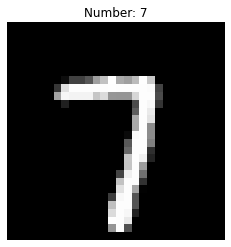

In [6]:
# Visualize a random sample of the data
random_index = random.randint(0, len(x_train))

plt.imshow(x_train[random_index], cmap="gray")
plt.axis(False)
plt.title(f"Number: {y_train[random_index]}")

In [7]:
# Map augment to the data, batch it, cache and prefetch
x_train = x_train/255.
x_test = x_test/255.

In [18]:
# Turn numpy arrays into tensorflow datasets
train_data = tf.data.Dataset.from_tensor_slices((x_train, y_train))
test_data = tf.data.Dataset.from_tensor_slices((x_test, y_test))

In [19]:
# Batch data and shuffle x_train
train_data = train_data.shuffle(100).batch(32)
test_data = test_data.batch(32)

## Create model

In [20]:
# Using EfficientNetB0
from tensorflow.keras import layers

model = tf.keras.models.Sequential([
    layers.Input(shape=(28, 28, 1), name="input_layer", dtype=tf.float32),
    layers.Convolution2D(filters=50, kernel_size=(3,3), padding="valid", activation="relu"),
    layers.MaxPool2D(),
    layers.Convolution2D(filters=25, kernel_size=(3,3), padding="valid", activation="relu"),
    layers.MaxPool2D(),
    layers.Convolution2D(filters=15, kernel_size=(3,3), padding="valid", activation="relu"),
    layers.GlobalAveragePooling2D(),
    layers.Dense(10, activation="softmax", name="output_layer")
])

In [21]:
# model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 50)        500       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 50)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 25)        11275     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 25)         0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 3, 3, 15)          3390      
                                                                 
 global_average_pooling2d_1   (None, 15)              

In [22]:
# Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [23]:
# Create an EarlyStopping callback
earlyStopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss",
                                                 patience=3)

In [24]:
# Fit the model
model.fit(train_data,
          epochs=20,
          validation_data=test_data,
          callbacks=[earlyStopping])

Epoch 1/20
1875/1875 [==============================] - 9s 4ms/step - loss: 0.4407 - accuracy: 0.8625 - val_loss: 0.1775 - val_accuracy: 0.9456
Epoch 2/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1535 - accuracy: 0.9534 - val_loss: 0.1203 - val_accuracy: 0.9641
Epoch 3/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1086 - accuracy: 0.9671 - val_loss: 0.0935 - val_accuracy: 0.9733
Epoch 4/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0842 - accuracy: 0.9743 - val_loss: 0.0783 - val_accuracy: 0.9747
Epoch 5/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0679 - accuracy: 0.9795 - val_loss: 0.0771 - val_accuracy: 0.9764
Epoch 6/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0576 - accuracy: 0.9826 - val_loss: 0.0570 - val_accuracy: 0.9813
Epoch 7/20
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0491 - accuracy: 0.9851 - val_loss: 0.0557 - val_accuracy:

In [25]:
# Evaluate on test_data
model.evaluate(test_data)

313/313 [==============================] - 1s 3ms/step - loss: 0.0478 - accuracy: 0.9847


[0.047822486609220505, 0.9847000241279602]

In [26]:
# Save the model
model.save("Mnist_model")

In [39]:
# Function to predict on an image
def pred_and_plot(model, image):
  model_pred_probs = model.predict(tf.expand_dims(image, axis=0))
  print(model_pred_probs)
  model_pred = tf.argmax(tf.squeeze(model_pred_probs))

  plt.imshow(image, cmap="gray")
  plt.title(f"Prediction: {model_pred}")
  plt.axis(False)


1/1 [==============================] - 0s 17ms/step
[[2.3178059e-09 1.9816941e-15 2.6291579e-14 2.7717086e-08 2.5947931e-14
  9.9999976e-01 7.7390830e-08 9.4972419e-18 1.0243121e-07 2.9881859e-09]]


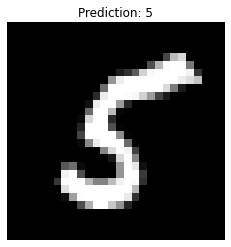

In [50]:
# Test the model on random images
random_index = random.randint(0, len(x_test))
pred_and_plot(model, x_test[random_index])